In [1]:
pip install pandas scikit-learn plotly matplotlib seaborn


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: /opt/homebrew/Cellar/jupyterlab/4.2.3/libexec/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix

def load_data(filepath):
    """Load data from CSV file and ensure necessary columns exist."""
    df = pd.read_csv(filepath)
    if 'agent' not in df.columns or 'prediction' not in df.columns:
        raise ValueError("The CSV file must contain 'agent' and 'prediction' columns")
    return df

def calculate_metrics(true_labels, predicted_labels):
    """Calculate and return precision, recall, F1 score, and accuracy."""
    precision = precision_score(true_labels, predicted_labels, average='weighted', zero_division=0)
    recall = recall_score(true_labels, predicted_labels, average='weighted', zero_division=0)
    f1 = f1_score(true_labels, predicted_labels, average='weighted', zero_division=0)
    accuracy = accuracy_score(true_labels, predicted_labels)
    return precision, recall, f1, accuracy

def plot_confusion_matrix(conf_matrix, labels):
    """Plot confusion matrix using seaborn."""
    plt.figure(figsize=(10, 7))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

def display_metrics(metrics):
    """Display metrics in a formatted way."""
    metrics_df = pd.DataFrame(list(metrics.items()), columns=['Metric', 'Value'])
    print("\nClassification Metrics:")
    print(metrics_df.to_string(index=False))

Precision: 0.9676
Recall: 0.9640
F1 Score: 0.9620
Accuracy: 0.9640


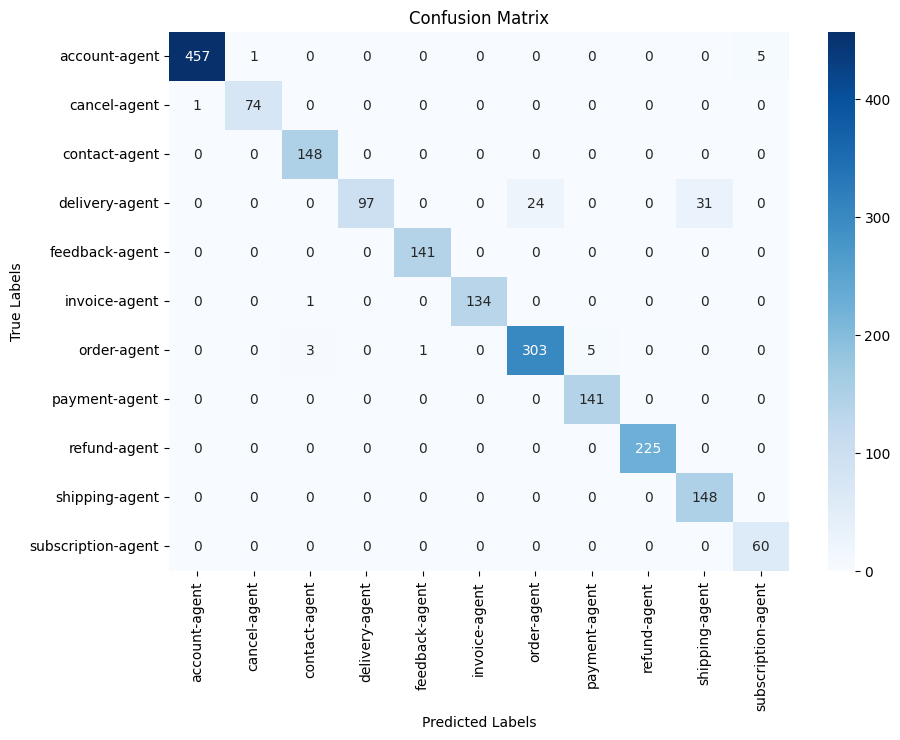


Classification Metrics:
   Metric    Value
Precision 0.967563
   Recall 0.964000
 F1 Score 0.961967
 Accuracy 0.964000


In [3]:
result_csv_path = 'docs/llm_prediction.csv'
df = load_data(result_csv_path) 
true_labels = df['agent']
predicted_labels = df['prediction']
precision, recall, f1, accuracy = calculate_metrics(true_labels, predicted_labels)
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Accuracy: {accuracy:.4f}")   
labels = sorted(set(true_labels) | set(predicted_labels))
conf_matrix = confusion_matrix(true_labels, predicted_labels, labels=labels)    
plot_confusion_matrix(conf_matrix, labels)   
metrics = {
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1,
    'Accuracy': accuracy
    }
display_metrics(metrics)